# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alan Kurniawan
- **Email:** alankurniawan0002@gmail.com
- **ID Dicoding:** alan_kurniawan_756

## Menentukan Pertanyaan Bisnis

#### 1. Bagaimana perkembangan jumlah pengguna (baik kasual maupun terdaftar) sepeda dari bulan ke bulan dari tahun 2011 hingga tahun 2012?
#### 2. Bagaimana hubungan jumlah pengguna sepeda dengan kondisi cuaca?
#### 3. Bagaimana hubungan jumlah pengguna sepeda dengan hari kerja (workingday)?





## Import Semua Packages/Library yang Digunakan

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data
Pada proses ini, kita akan mengimport data-data yang diperlukan, yakni dalam Bike Sharing Dataset terdapat 2 file berformat csv, yaitu day.csv dan hour_csv

In [135]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Alan140598/Bike-Sharing-Dataset-Analysis/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [136]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Alan140598/Bike-Sharing-Dataset-Analysis/data/hour.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data
Pada tahap ini, kita akan menilai kualitas dari data day.csv dan data hour.csv, lalu kita akan mencari segala permasalahan yang ada pada tiap DataFrame.

#### Menilai tabel day.csv

In [137]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak ada missing value pada output di atas. Semua kolom memiliki nilai dengan range index nya 731 entries.
Output menunjukan bahwa ada kesalahan tipe data untuk kolom dteday. Kolom dteday seharusnya bertipe datetime, bukan object.

In [138]:
print("Jumlah duplikasi :", day_df.duplicated().sum())

Jumlah duplikasi : 0


Tidak ada duplikasi dalam tabel day.csv

In [139]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari output berdasarkan tabel day di atas, kita menemukan beberapa informasi menarik, antara lain :
Indeks pada tabel day_csv berjumlah sebanyak 731 dan rataannya 366
Musim rata-rata sebesar 2.50, mengindikasikan mayoritas terjadi di musim panas
Rata-rata tahun bernilai 0.5 (menunjukan perbandingan untuk tahun 2011 dan tahun 2012)
Rata-rata bulan sebesar 6.51 (menunjukan rata-rata bulan dalam 12 bulan 1 tahun)
Persentase libur sebesar 0.028 atau 2.8% dalam 2 tahun
Rata-rata hari tiap minggunya sebesar 2.99 atau 3
Rata-rata hari kerja sebesar 0.68 atau 68.40%. Ini berarti hari kerja menjadi meyoritas hari di mana sepeda disewa.
Rata-rata cuaca berada pada nilai 1.39. Ini berarti mayoritas berada pada cuaca yang baik.
Rata-rata suhu sebenarnya bernilai 0.49
Rata-rata suhu perasaan(atemp) bernilai 0.47, mendekati nilai suhu sebenarnya
Rata-rata kelembapan sebesar 0.62 atau 62.80%
Rata-rata kecepatan angin sebesar 0.19
Rata-rata jumlah pengguna kasual sebanyak 848 
Rata-rata jumlah pengguna terdaftar sebanyak 3656
Rata-rata jumlah sewa sepeda sebanyak 4504 



#### Menilai tabel hour.csv

In [140]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari output di atas, terdapat kesalahan pada tipe data untuk kolom dteday. Seharusnya tipe data yang benar untuk kolom tersebut adalah datetime, bukan object. Diketahui juga bahwa tabel hour memilik range index sebesar 17379 dan tidak ada value missing untuk jumlah data tiap kolomnya.

In [141]:
print("Jumlah duplikasi :", hour_df.duplicated().sum())

Jumlah duplikasi : 0


Tidak ada duplikasi pada tabel hour.csv

In [142]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada keanehan pada output di atas. Berikut informasi menarik yang didapat : Dataset tersebut memiliki 17379 index atau entries.
Rata-rata musim sebesar 2.50. Artinya musim paling dominan adalah musim panas(summer)
Rata-rata tahun sebesar 0.5, mengindikasikan perbandingan antara tahun 2011 dan 2012
Rata-rata bulan sebesar 6.53, mengindikasikan mayoritas di bulan Juli(7)
Rata-rata jam sebesar 11.54
Rata-rata libur sebesar 0.028
Rata-rata hari tiap minggunya sebesar 3
Rata-rata hari kerja sebesar 0.68 atau 68%. Artinya hari kerja menjadi hari mayoritas.
Rata-rata kondisi cuaca menunjukan nilai 1.42. Mayoritas berada pada cuaca yang baik.
Rata-rata suhu berada pada nilai 0.49
Rata-rata suhu perasaan (atemp) berada pada nilai 0.47, mendekati nilai suhu sebenarnya
Rata-rata kecepatan angin bernilai 0.19
Rata-rata jumlah pengguna kasual sebanyak 35 per jamnya
Rata-rata jumlah pengguna terdaftar sebanyak 153 per jamnya
Rata-rata jumlah sewa sepeda sebanyak 189 per jamnya

### Cleaning Data
Pada proses ini, kita akan membersihkan data dengan memperbaiki masalah yang teridentifikasi dalam proses menilai data (assessing data) sebelumnya

#### Mengganti tipe data kolom dteday pada tabel day.csv

In [143]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

Kode di atas akan mengubah tipe data pada kolom dteday menjadi datetime. Untuk memastikan kode tersebut berfungsi, kita akan periksa kembali tabel day.csv menggunakan method info()

In [144]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Mengganti tipe data kolom dteday pada tabel hour.csv

In [145]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

Kode di atas akan mengubah tipe data pada kolom dteday menjadi datetime. Untuk memastikan kode tersebut berfungsi, kita akan periksa kembali tabel hour.csv menggunakan method info()

In [146]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

Pada proses EDA ini, langkah pertama kita, adalah melihat rangkuman parameter statistik untuk kolom numerik dan kolom non-numerik dari Bike Sharing Dataset untuk tabel day.csv yang memuat berbagai informasi seperti : instant, season, year, month, dteday, holiday, weekday, workingday, weathersit, temp, humidity, atemp, windspeeds, casual, registered, cnt.


In [147]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Pada langkah kedua, kita akan melihat rangkuman parameter statistik untuk kolom numerik dan kolom non-numerik dari Bike Sharing Dataset untuk tabel hour.csv yang memuat berbagai informasi seperti : instant, season, year, month, hour, dteday, holiday, weekday, workingday, weathersit, temp, humidity, atemp,windspeed, casual, registered, cnt.

In [148]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Kita telah memiliki rangkuman parameter statistik dari kedua tabel Bike Sharing Dataset. Sekarang kita akan mencoba untuk mengeksplor lebih jauh kedua tabel tersebut untuk menjawab pertanyaan bisnis yang sudah kita ajukan sebelumnya di awal.

### Explore Tabel day.csv

Melihat demografi pengguna sepeda (kasual atau terdaftar) berdasarkan musim dan cuaca dengan method groupby() diikuti method agg()

In [149]:
day_df.groupby(by="season").agg({
    "casual": ['mean', 'min', 'max'],
    "registered": ['mean', 'min', 'max',],
    "cnt": ['mean', 'min', 'max', 'sum']
})

casual              registered                     cnt        \
               mean  min   max         mean  min   max         mean   min   
season                                                                      
1        334.928177    9  3155  2269.204420  416  5315  2604.132597   431   
2       1106.097826  120  3410  3886.233696  674  6456  4992.331522   795   
3       1202.611702  118  3160  4441.691489  889  6917  5644.303191  1115   
4        729.112360    2  3031  3999.050562   20  6946  4728.162921    22   

                       
         max      sum  
season                 
1       7836   471348  
2       8362   918589  
3       8714  1061129  
4       8555   841613

Berdasarkan output di atas, kita mengetahui berbagai informasi penting, antara lain: pada season 1 (springer) jumlah pengguna sepeda mencapai 471 ribu, pada season 2 (summer) jumlah pengguna sepeda mencapai 918 ribu, pada season 3(fall) jumlah pengguna sepeda mencapai 1.06 juta, pada season 4 (winter) jumlah pengguna sepeda mencapai 841 ribu. Jumlah pengguna yang dimaksudkan adalah pengguna casual dan registered. Kesimpulan : Jumlah pengguna terbanyak ada pada musim fall dan jumlah pengguna paling sedikit ada di musim spring. 

In [150]:
day_df.groupby(by="weathersit").agg({
    "casual": ['mean','min', 'max', 'sum'], 
    "registered": ['mean', 'min', 'max', 'sum'],
    "cnt": ['mean', 'min','max', 'sum']
})

casual                     registered                      \
                  mean min   max     sum         mean  min   max      sum   
weathersit                                                                  
1           964.030238  15  3410  446346  3912.755940  416  6946  1811606   
2           687.352227   9  3155  169776  3348.510121  491  6844   827082   
3           185.476190   2  1264    3895  1617.809524   20  4324    33974   

                    cnt                      
                   mean  min   max      sum  
weathersit                                   
1           4876.786177  431  8714  2257952  
2           4035.862348  605  8362   996858  
3           1803.285714   22  4639    37869

Dari output di atas, kita tahu bahwa rata-rata jumlah pengguna sepeda tertinggi ada di kode 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) dengan total jumlah pengguna mencapai 225 ribu. 
Dan kita tahu kode 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) tidak memiliki nilai, artinya tidak ada pengguna sepeda yang pernah menyewa sepeda pada keadaan cuaca berkode 4.
Selain itu, musim dengan kode 3 memiliki rata-rata paling sedikit dibandingkan dua musim lainnya dengan total jumlah pennguna hanya mencapai 37 ribu.

Melihat demografi jumlah pengguna sepeda berdasarkan temp, atemp, humidity, dan windspeed

In [151]:
day_df.groupby(by="temp").agg({
    "casual": ['min', 'max', 'sum'],
    "registered": ['min', 'max', 'sum'],
    "cnt": ['min', 'max', 'sum']
})

casual             registered               cnt            
            min   max   sum        min   max   sum   min   max   sum
temp                                                                
0.059130     93    93    93        888   888   888   981   981   981
0.096522    150   150   150        836   836   836   986   986   986
0.097391     86    86    86       1330  1330  1330  1416  1416  1416
0.107500     95    95    95       2273  2273  2273  2368  2368  2368
0.127500     73    73    73       1456  1456  1456  1529  1529  1529
...         ...   ...   ...        ...   ...   ...   ...   ...   ...
0.834167    829   829   829       4634  4634  4634  5463  5463  5463
0.838333    670   670   670       3176  3176  3176  3846  3846  3846
0.848333    562   562   562       2825  2825  2825  3387  3387  3387
0.849167    987   987   987       2298  2298  2298  3285  3285  3285
0.861667   1448  1448  1448       3392  3392  3392  4840  4840  4840

[499 rows x 9 columns]

In [152]:
day_df.groupby(by="atemp").agg({
    "casual": ['min', 'max', 'sum'],
    "registered": ['min', 'max', 'sum'],
    "cnt": ['min', 'max', 'sum']
})

casual             registered               cnt            
            min   max   sum        min   max   sum   min   max   sum
atemp                                                               
0.079070     93    93    93        888   888   888   981   981   981
0.098839    150   150   150        836   836   836   986   986   986
0.101658     73    73    73       1456  1456  1456  1529  1529  1529
0.116175     54    54    54        768   768   768   822   822   822
0.117930     86    86    86       1330  1330  1330  1416  1416  1416
...         ...   ...   ...        ...   ...   ...   ...   ...   ...
0.794829   1050  1050  1050       2556  2556  2556  3606  3606  3606
0.804287    987   987   987       2298  2298  2298  3285  3285  3285
0.804913   1448  1448  1448       3392  3392  3392  4840  4840  4840
0.826371    632   632   632       3152  3152  3152  3784  3784  3784
0.840896    562   562   562       2825  2825  2825  3387  3387  3387

[690 rows x 9 columns]

In [153]:
day_df.groupby(by="hum").agg({
    "casual": ['min', 'max', 'sum'],
    "registered": ['min', 'max', 'sum'],
    "cnt": ['min', 'max', 'sum']
})


casual             registered               cnt            
            min   max   sum        min   max   sum   min   max   sum
hum                                                                 
0.000000     46    46    46        577   577   577   623   623   623
0.187917    532   532   532       1103  1103  1103  1635  1635  1635
0.254167   3252  3252  3252       3605  3605  3605  6857  6857  6857
0.275833   2230  2230  2230       2939  2939  2939  5169  5169  5169
0.290000    531   531   531       4571  4571  4571  5102  5102  5102
...         ...   ...   ...        ...   ...   ...   ...   ...   ...
0.948261    114   114   114        491   491   491   605   605   605
0.949583    126   126   126       2468  2468  2468  2594  2594  2594
0.962500     69    69    69       1538  1538  1538  1607  1607  1607
0.970417     50    50    50        655   655   655   705   705   705
0.972500    258   258   258       2137  2137  2137  2395  2395  2395

[595 rows x 9 columns]

In [154]:
day_df.groupby(by="windspeed").agg({
    "casual": ['mean', 'min', 'max', 'sum'],
    "registered": ['mean', 'min', 'max', 'sum'],
    "cnt": ['mean', 'min', 'max', 'sum']
})

casual                   registered                       cnt  \
             mean   min   max   sum       mean   min   max   sum    mean   
windspeed                                                                  
0.022392    949.0   949   949   949     4036.0  4036  4036  4036  4985.0   
0.042304   1514.0  1514  1514  1514     3603.0  3603  3603  3603  5117.0   
0.045404   2235.0  2235  2235  2235     3174.0  3174  3174  3174  5409.0   
0.045408    120.0   120   120   120     1592.0  1592  1592  1592  1712.0   
0.046650    337.0   337   337   337     4750.0  4750  4750  4750  5087.0   
...           ...   ...   ...   ...        ...   ...   ...   ...     ...   
0.417908    208.0   208   208   208     1705.0  1705  1705  1705  1913.0   
0.421642    317.0   317   317   317     2415.0  2415  2415  2415  2732.0   
0.422275    471.0   471   471   471     3724.0  3724  3724  3724  4195.0   
0.441563    486.0   486   486   486     4896.0  4896  4896  4896  5382.0   
0.507463    532.0   532   532   532     1103.0  1103  1103  1103  1635.0   

                             
            min   max   sum  
windspeed                    
0.022392   4985  4985  4985  
0.042304   5117  5117  5117  
0.045404   5409  5409  5409  
0.045408   1712  1712  1712  
0.046650   5087  5087  5087  
...         ...   ...   ...  
0.417908   1913  1913  1913  
0.421642   2732  2732  2732  
0.422275   4195  4195  4195  
0.441563   5382  5382  5382  
0.507463   1635  1635  1635  

[650 rows x 12 columns]

Dari keempat ouput di atas, ternyata karena jumlah baris yang terlalu banyak sehingga, program hanya akan menampilkan sample dari 5 baris pertama dan 5 baris terakhir. Namun kita tetap dapat mampu membaca data tersebut, karena jika kita perhatikan, besaran nilai untuk temp, atemp, humidity, dan windspeed diurutkan dari yang terkecil (baris pertama) ke terbesar (baris paling akhir) meskipun kita belum mengetahui korelasinya dengan jumlah pengguna sepeda.

Melihat demografi pengguna sepeda (kasual atau terdaftar) berdasarkan weekday, hari libur, dan hari kerja dengan method groupby() diikuti method agg()

In [155]:
day_df.groupby(by="weekday").agg({
    "casual": ['mean', 'min', 'max'],
    "registered": ['mean', 'min', 'max'],
    "cnt": ['mean', 'min', 'max', 'sum']
})

casual             registered                      cnt        \
                mean min   max         mean   min   max         mean   min   
weekday                                                                      
0        1338.295238  54  3283  2890.533333   451  5657  4228.828571   605   
1         674.133333   2  3065  3663.990476    20  6435  4338.123810    22   
2         556.182692   9  1348  3954.480769   573  6697  4510.663462   683   
3         551.144231   9  2562  3997.394231   432  6946  4548.538462   441   
4         590.961538  15  1405  4076.298077   416  6781  4667.259615   431   
5         752.288462  38  2469  3938.000000  1129  6917  4690.288462  1167   
6        1465.257143  57  3410  3085.285714   570  5966  4550.542857   627   

                       
          max     sum  
weekday                
0        8227  444027  
1        7525  455503  
2        7767  469109  
3        8173  473048  
4        7804  485395  
5        8362  487790  
6        8714  477807

Dari output di atas, urutan jumlah pengguna sepeda dari yang terbanyak hingga terkecil secara berturut turut adalah ; 5(jumat), 4(kamis), 6(sabtu), 3(rabu), 2(selasa), 1(senin), 0(minggu)

In [156]:
day_df.groupby(by="holiday").agg({
    "casual": ['mean', 'min', 'max'],
    "registered": ['mean', 'min', 'max'],
    "cnt": ['mean', 'min', 'max', 'sum']
})

casual              registered                     cnt        \
                mean  min   max         mean  min   max         mean   min   
holiday                                                                      
0         841.771831    2  3410  3685.332394   20  6946  4527.104225    22   
1        1064.714286  117  3065  2670.285714  573  5172  3735.000000  1000   

                        
          max      sum  
holiday                 
0        8714  3214244  
1        7403    78435

Dari ouput di atas, kita tahu bahwa pengguna sepeda lebih suka menyewa sepeda pada hari-hari bukan libur, atau lebih tepatnya pada hari-hari kerja.

In [157]:
day_df.groupby(by="workingday").agg({
    "casual": ['mean', 'min', 'max'],
    "registered": ['mean', 'min', 'max'],
    "cnt": ['mean', 'min', 'max', 'sum']
})

casual             registered                     cnt       \
                   mean min   max         mean  min   max         mean  min   
workingday                                                                    
0           1371.134199  54  3410  2959.034632  451  5966  4330.168831  605   
1            606.570000   2  2469  3978.250000   20  6946  4584.820000   22   

                           
             max      sum  
workingday                 
0           8714  1000269  
1           8362  2292410

Dari output di atas, dapat disimpulkan bahwa hari-hari kerja merupakan hari di mana banyak pengguna sepeda yang menyewa sepeda dibandingkan pada saat hari libur. Secara tidak langsung, hasil analisis kita terhadap jumlah pengguna sepeda pada workingday dan pada holiday bersesuaian dengan bukti kesimpulan akhir yang sama.

## Visualization & Explanatory Analysis

### Bagaimana perkembangan jumlah pengguna (baik kasual maupun terdaftar) sepeda dari bulan ke bulan dari tahun 2011 hingga tahun 2012?

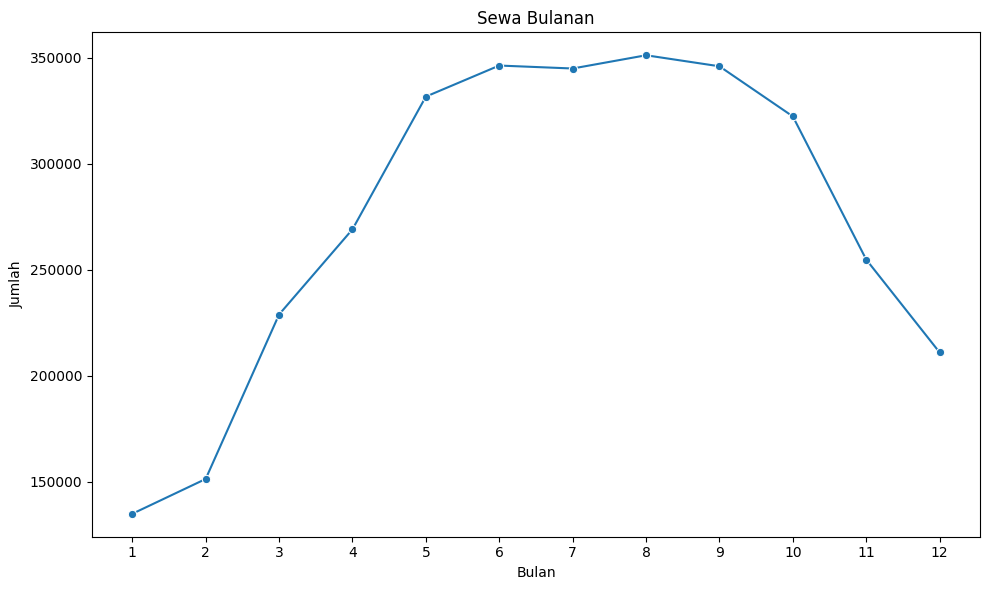

In [158]:
monthly_counts = day_df.groupby(by=["mnth"]).agg({
    "cnt": "sum"
}).reset_index()  

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_counts, x="mnth", y="cnt", marker="o")
plt.ylabel("Jumlah")
plt.xlabel("Bulan")
plt.title("Sewa Bulanan")
plt.xticks(ticks=monthly_counts["mnth"], labels=monthly_counts["mnth"])
plt.tight_layout()
plt.show()


### Bagaimana hubungan jumah pengguna sepeda (kasual dan terdaftar) dengan kondisi cuaca?

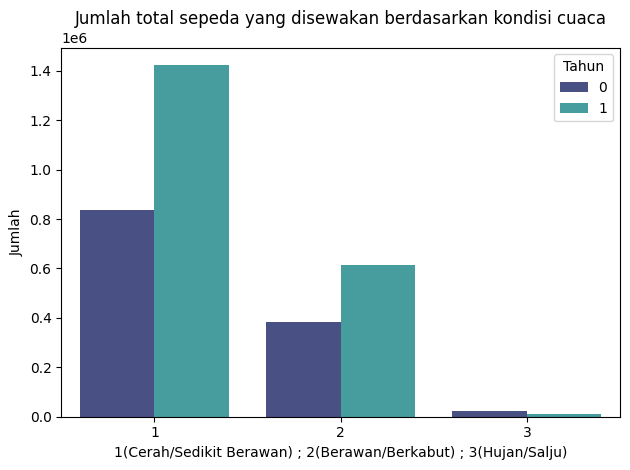

In [159]:
weather_counts = day_df.groupby(by=["weathersit", "yr"]).agg({
    "cnt": "sum"
}).reset_index()  


sns.barplot(data=weather_counts, x="weathersit", y="cnt", hue="yr", palette="mako")
plt.ylabel("Jumlah")
plt.xlabel("1(Cerah/Sedikit Berawan) ; 2(Berawan/Berkabut) ; 3(Hujan/Salju)")
plt.title("Jumlah total sepeda yang disewakan berdasarkan kondisi cuaca")
plt.legend(title="Tahun", loc="upper right")  
plt.tight_layout()
plt.show()

### Keterangan :
#### Tahun 0 = 2011
#### Tahun 1 = 2012

### Bagaimana hubungan jumah pengguna sepeda (kasual dan terdaftar) dengan hari kerja (workingday)?

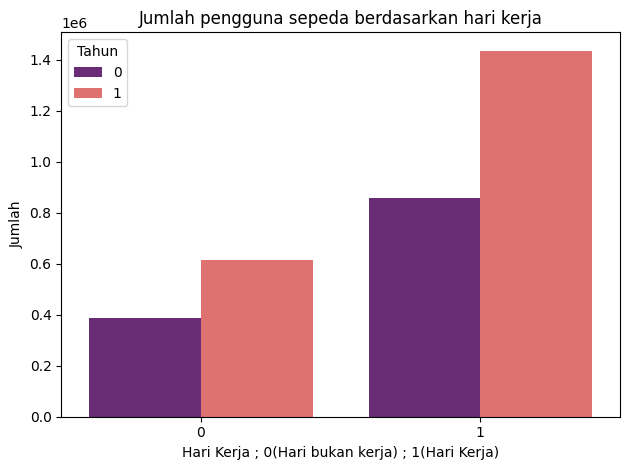

In [162]:
working_counts = day_df.groupby(by=["workingday","yr"]).agg({
    "cnt": "sum"
}).reset_index()  

sns.barplot(data=working_counts, x="workingday", y="cnt", hue="yr", palette="magma")
plt.ylabel("Jumlah")
plt.xlabel("Hari Kerja ; 0(Hari bukan kerja) ; 1(Hari Kerja)")
plt.title("Jumlah pengguna sepeda berdasarkan hari kerja")
plt.legend(title="Tahun", loc="upper left")  
plt.tight_layout()
plt.show()

### Keterangan :
#### Tahun 0 = 2011
#### Tahun 1 = 2012

## Conclusion

### Pertanyaan 1
Dari output grafik yang nampak, jumlah pengguna sepeda terus meningkat tiap bulannya, dari bulan ke-1(Januari) hingga bulan ke-8(Agustus), dengan titik teringgi berada pada bulan ke-8(Agustus) dengan jumlah pengguna mencapai 350 ribu orang. Sedangkan pada bulan September hingga Desember, jumlah pengguna sepeda terus mengalami penurunan hingga, kita tahu pada bulan ke-10(Oktober) hingga bulan ke-12(Desember) mengalami penurunan yang benar-benar signifikan, terlihat dari garis pada grafik yang turun miring ke bawah. 


### Pertanyaan 2
Jika kita lihat dari output grafik yang dihasilkan, dapat disimpulkan bahwa kondisi cuaca memang mempengaruhi jumlah pengguna sepeda baik yang sudah terdaftar maupun kasual. Cuaca yang cerah menjadi mayoritas sekaligus favorit bagi pengguna sepeda untuk menyewa sepeda dan beraktifitas. Disusul dengan cuaca yang mendung, namun tidak hujan juga memperoleh jumlah pengguna sepeda yang lumayan banyak. Tahun 2012, menjadi tahun dimana jumlah pengguna sepeda meningkat secara signifikan untuk cuaca cerah dan cuaca berawan dibandingkan d tahun 2011.Sedangkan, cuaca hujan/salju menjadi minoritas bagi pengguna sepeda untuk beraktifitas. Bahkan, jika kita lihat, kondisi cuaca berkategori buruk (kode = 4) tidak memiliki jumlah pengguna sepeda, karena itu tidak ditampilkan pada output grafik.
### Pertanyaan 3
Hubungan antara jumlah pengguna sepeda dan hari-hari kerja ternyata lumayan kuat. Terbukti bahwa pada hari kerja, orang-orang cenderung menyewa sepeda, mungkin saja sebagai transportasi mereka menuju lokasi kerja. Sedangkan pada hari libur, jumlah pengguna sepeda juga lumayan banyak, walaupun lebih sedikit dari pada saat hari kerja, kita bisa asumsikan user menggunakan sepeda untuk beraktifitas santai, berolahraga, maupun sekedar jalan-jalan. Jika dilihat berdasarkan tahun, tahun 2012 menjadi tahun dimana pada hari kerja, orang-orang lebih banyak menyewa sepeda dibandingkan pada tahun 2011


In [161]:
day_df.to_csv("day.csv", index=False)